In [1]:
config_0 = {  # pylint:disable=invalid-name
    'max_depth': 15,
    'reg_alpha': 1.365,
    'subsample': 0.7084,
    'num_leaves': 34,
    'reg_lambda': 1.028,
    'n_estimators': 376,
    'colsample_bytree': 0.9487,
    'min_child_weight': 0.06395
}


In [16]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt 
%matplotlib inline


DATADIR = '../data'

In [3]:
X = np.load('../work/X_train_GBDT.npy')  # pylint:disable=invalid-name
y = np.load('../work/y_train_GBDT.npy')  # pylint:disable=invalid-name

In [4]:
y[:,0].max()

2.7277358381109464

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
lgbm = LGBMRegressor(**config_0)

In [7]:
X.shape

(3125, 9)

In [8]:
lgbm.fit(X_train, y_train[:,0])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9487,
              importance_type='split', learning_rate=0.1, max_depth=15,
              min_child_samples=20, min_child_weight=0.06395,
              min_split_gain=0.0, n_estimators=376, n_jobs=-1, num_leaves=34,
              objective=None, random_state=None, reg_alpha=1.365,
              reg_lambda=1.028, silent=True, subsample=0.7084,
              subsample_for_bin=200000, subsample_freq=0)

In [9]:
test_pred = lgbm.predict(X_test)

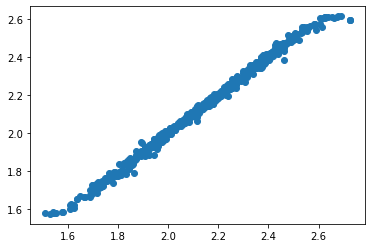

In [10]:
plt.scatter(y_test[:,0], test_pred)

In [19]:
rg = pd.read_csv(os.path.join(DATADIR, 'rg_results.csv'))

In [24]:
np.argmax(rg['Rg'])

3124

In [21]:
x_full_random = pd.read_csv(os.path.join(DATADIR, 'X_full_random.csv'))

In [26]:
x_full_random.iloc[3124]['smiles']

'[Tr][W][Tr][R][Tr][Ta][R][Ta][Tr][Ta][Tr][Tr][R][R][R][W][W][Tr][Tr][Ta][R][Ta][R][Ta][W][W][Ta][Ta][Tr][W][Tr][R][W][W][W][R][Ta][W][R][Ta][Ta][W][W][Ta][R][Tr][Tr][R]'